In [1]:
# !pip install pandas
# !pip install matplotlib
# !pip install numpy
# !pip install psycopg2
# !pip install pyinstaller
#!pip install flask

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import psycopg2
from psycopg2 import sql
from psycopg2.extras import RealDictCursor
import time
import matplotlib.pyplot as plt
from ipywidgets import interact_manual, widgets, VBox, HBox
import ipywidgets as widgets
from flask import Flask
import random
from datetime import datetime, timedelta

In [3]:
db_config = {
    'dbname': 'projetoscti6',
    'user': 'projetoscti6',
    'password': 'eq473a483',
    'host': 'pgsql21-farm10.kinghost.net',
    'port': '5432',       
}

In [4]:
def fetch_table_data(table_name):
    conn = psycopg2.connect(**db_config)
    cursor = conn.cursor()

    # Substitua 'tabela' pelo nome da tabela da qual você deseja receber os dados
    query = f"SELECT * FROM {table_name};"
    cursor.execute(query)

    # Recupere todos os registros da consulta
    data = cursor.fetchall()

    conn.close()

    return data

In [5]:

materias=fetch_table_data('materias')
nomes_das_colunas_materias=['nome_materia','created_at','updated_at']

assuntos=fetch_table_data('assuntos')
nomes_das_colunas_assuntos=['nome_assunto','carga_horaria','fk_materia','created_at','updated_at']

alternativas=fetch_table_data('alternativas')
nomes_das_colunas_alternativas=['letra','descricao_alternativa','imagem_alternativa', 'correta','fk_id_exercicio','created_at','updated_at']
exercicios=fetch_table_data('exercicios')
nomes_das_colunas_exercicios = [
    "id_exercicio",
    "descricao_exercicio",
    "imagem_exercicio",
    "ano_exercicio",
    "vestibular",
    "fk_assunto",
    "fk_materia",
    "created_at",
    "updated_at"
]

respostas=fetch_table_data('resposta_alunos')
nomes_das_colunas_respostas = [
    "fk_id_exercicio",
    "letra_respondida",
    "created_at",
    "updated_at"
]
alunos=fetch_table_data('alunos')
nomes_das_colunas_alunos = ['cpf_aluno', 'rg_aluno', 'nome_aluno', 'email_aluno', 'celular_aluno', 'escola_aluno', 'serie_aluno', 'imagem_aluno', 'senha_aluno','created_at','updated_at']

In [6]:
dt_alunos=pd.DataFrame(alunos, columns=nomes_das_colunas_alunos)
dt_exercicios=pd.DataFrame(exercicios, columns=nomes_das_colunas_exercicios)
dt_alternativas=pd.DataFrame(alternativas, columns=nomes_das_colunas_alternativas)
dt_respostas=pd.DataFrame(respostas, columns=nomes_das_colunas_respostas)
dt_materias=pd.DataFrame(materias, columns=nomes_das_colunas_materias)
dt_assuntos=pd.DataFrame(assuntos, columns=nomes_das_colunas_assuntos)

ValueError: 7 columns passed, passed data had 8 columns

In [14]:
# import pandas as pd

# Exemplos de dados para a tabela 'materias'
dados_materias = []
for i in range(20):
    dados_materias.append({
        'nome_materia': f'Matéria {i + 1}',
        'created_at': '2023-08-10',
        'updated_at': '2023-08-10'
    })

# Exemplos de dados para a tabela 'assuntos'
dados_assuntos = []
for i in range(20):
    dados_assuntos.append({
        'nome_assunto': f'Assunto {i + 1}',
        'carga_horaria': 10 + (i % 5),
        'fk_materia': f'Matéria {i % 10 + 1}',
        'created_at': '2023-08-10',
        'updated_at': '2023-08-10'
    })

# Exemplos de dados para a tabela 'exercicios'
dados_exercicios = []
for i in range(20):
    dados_exercicios.append({
        'id_exercicio': i + 1,
        'descricao_exercicio': f'Exercício {i + 1}',
        'imagem_exercicio': f'exercicio_{i + 1}.png',
        'ano_exercicio': 2023,
        'vestibular': 'ENEM' if i % 2 == 0 else 'FUVEST',
        'fk_assunto': f'Assunto {i % 10 + 1}',
        'fk_materia': f'Matéria {i % 10 + 1}',
        'created_at': '2023-08-10',
        'updated_at': '2023-08-10'
    })

# Exemplos de dados para a tabela 'alternativas'
dados_alternativas = []
for i in range(20):
    dados_alternativas.append({
        'letra': chr(65 + i),  # Letra A, B, C, ...
        'descricao_alternativa': f"Resposta {chr(65 + i)}",
        'imagem_alternativa': f"imagem_{chr(65 + i)}.png",
        'correta': i % 2 == 0,  # Alternando entre corretas e incorretas
        'fk_id_exercicio': (i % 10) + 1,
        'created_at': '2023-08-10',
        'updated_at': '2023-08-10'
    })

# Exemplos de dados para a tabela 'resposta_alunos'
# dados_respostas = []
# for i in range(20):
#     dados_respostas.append({
#         'fk_id_exercicio': (i % 10) + 1,
#         'letra_respondida': chr(65 + (i % 4)),  # A, B, C, D em sequência
#         'created_at': '2023-08-10',
#         'updated_at': '2023-08-10'
#     })

meses = ['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08']

dados_respostas = []
letras = ['A', 'B', 'C', 'D']
for i in range(20):
    data_mes = random.choice(meses)  # Seleciona um mês aleatoriamente
    dia = random.randint(1, 28)  # Seleciona um dia aleatoriamente (assumindo meses com 28 dias)
    data = datetime.strptime(f"{data_mes}-{dia}", "%Y-%m-%d")
    
    dados_respostas.append({
        'fk_id_exercicio': (i % 10) + 1,
        'letra_respondida': letras[i % 4],
        'created_at': data.strftime("%Y-%m-%d"),
        'updated_at': data.strftime("%Y-%m-%d")
    })

# Exemplos de dados para a tabela 'alunos'
dados_alunos = []
for i in range(20):
    cpf_base = 12345678900 + i
    dados_alunos.append({
        'cpf_aluno': f'{cpf_base + i:011d}',  # CPF fictício
        'rg_aluno': f'{1000000 + i + 1}',  # RG fictício
        'nome_aluno': f'Aluno {i + 1}',
        'email_aluno': f'aluno{i + 1}@example.com',
        'celular_aluno': f'98765432{i + 1:02d}',
        'escola_aluno': f'Escola {chr(65 + (i % 5))}',
        'serie_aluno': f'{i % 5 + 1}º ano',
        'imagem_aluno': f'aluno_{i + 1}.png',
        'senha_aluno': f'senha{i + 1}',
        'created_at': '2023-08-10',
        'updated_at': '2023-08-10'
    })

# Convertendo os exemplos de dados em DataFrames
df_materias = pd.DataFrame(dados_materias)
df_assuntos = pd.DataFrame(dados_assuntos)
df_exercicios = pd.DataFrame(dados_exercicios)
df_alternativas = pd.DataFrame(dados_alternativas)
df_respostas = pd.DataFrame(dados_respostas)
df_alunos = pd.DataFrame(dados_alunos)


In [15]:
df_respostas

,fk_id_exercicio,letra_respondida,created_at,updated_at
0,1,A,2023-02-15,2023-02-15
1,2,B,2023-03-23,2023-03-23
2,3,C,2023-06-24,2023-06-24
3,4,D,2023-03-20,2023-03-20
4,5,A,2023-08-26,2023-08-26
5,6,B,2023-06-10,2023-06-10
6,7,C,2023-06-13,2023-06-13
7,8,D,2023-06-06,2023-06-06
8,9,A,2023-06-18,2023-06-18
9,10,B,2023-05-12,2023-05-12


In [16]:
df_respostas.rename(columns={'fk_id_exercicio': 'id_exercicio'}, inplace=True)
df_alternativas.rename(columns={'fk_id_exercicio': 'id_exercicio'}, inplace=True)
# df_respostas

In [17]:
respostas_exercicios=pd.merge(df_respostas, df_exercicios, on='id_exercicio')
all_response=pd.merge(respostas_exercicios, df_alternativas, on='id_exercicio')

In [18]:
all_response[0:10]
materias_unicas = all_response["fk_materia"].unique()
opcoes_materias = [('todos','todos')] + [(materia,materia) for materia in materias_unicas]

assuntos_unicos = all_response["fk_assunto"].unique()
opcoes_assuntos = [('todos','todos')] + [(assunto,assunto) for assunto in assuntos_unicos]

vestibulares_unicos = all_response["vestibular"].unique()
opcoes_vestibulares = [('todos','todos')] + [(vestibular,vestibular) for vestibular in vestibulares_unicos]

In [19]:
all_response.drop(columns=['descricao_exercicio','imagem_exercicio','created_at_y','updated_at_y',
                 'descricao_alternativa','imagem_alternativa','created_at','updated_at'], inplace=True)

In [20]:
all_response['correta']=False
filtro = (all_response['letra'] == all_response['letra_respondida'])
all_response.loc[filtro, 'correta'] = True
all_response_2=all_response

In [21]:
all_response_2['updated_at_x']=pd.to_datetime(all_response_2['updated_at_x'])
all_response_2['created_at_x']=pd.to_datetime(all_response_2['created_at_x'])

In [22]:
def erros_acertos_materia(all_response):
#     all_response_aux=all_response[all_response['fk_materia']==materia]
    all_response=all_response_2
    all_response_certo=all_response[all_response['correta']==True]
    contagem_certa = all_response_certo['fk_materia'].value_counts()
    contagem_certa = contagem_certa.reset_index()
    contagem_certa.rename(columns={'index': 'materia'}, inplace=True)
    
    all_response_errado=all_response[all_response['correta']==False]
    contagem_errada = all_response_errado['fk_materia'].value_counts()
    contagem_errada = contagem_errada.reset_index()
    contagem_errada.rename(columns={'index': 'materia'}, inplace=True)
    contagem=pd.merge(contagem_certa, contagem_errada, on='materia', how='outer')
    contagem=contagem.fillna(0)

    plt.plot(contagem['materia'],contagem['fk_materia_x'], '-' )
    plt.plot(contagem['materia'],contagem['fk_materia_y'] ,'-' )
    plt.xticks(fontsize=7) 
   
    

#     plt.plot(range(1,11), valores2,'*--' ) 
#     plt.plot(range(1,11), valores3, 'v-.' )  

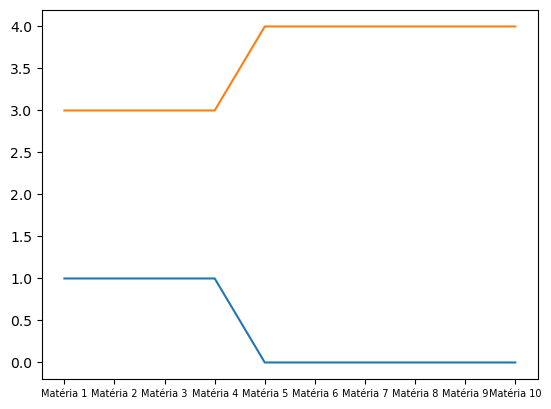

In [23]:
erros_acertos_materia(all_response)

In [24]:
def erros_acertos_vestibular(fig, ax,vestibular):
    all_response=all_response_2
    all_response_certo=all_response[all_response['correta']==True]
    all_response_certo=all_response_certo[all_response_certo['vestibular']==vestibular]
    contagem_certa = all_response_certo['fk_materia'].value_counts()
    contagem_certa = contagem_certa.reset_index()
    contagem_certa.rename(columns={'index': 'materia'}, inplace=True)
    
    all_response_errado=all_response[all_response['correta']==False]
    all_response_errado=all_response_errado[all_response_errado['vestibular']==vestibular]
    contagem_errada = all_response_errado['fk_materia'].value_counts()
    contagem_errada = contagem_errada.reset_index()
    contagem_errada.rename(columns={'index': 'materia'}, inplace=True)
    contagem=pd.merge(contagem_certa, contagem_errada, on='materia', how='outer')
    contagem=contagem.fillna(0)

    ax.plot(contagem["materia"], contagem["fk_materia_x"], "-")
    ax.plot(contagem["materia"], contagem["fk_materia_y"], "-")
    ax.set_xticks(contagem["materia"])
    ax.set_xticklabels(contagem["materia"], fontsize=7)
   

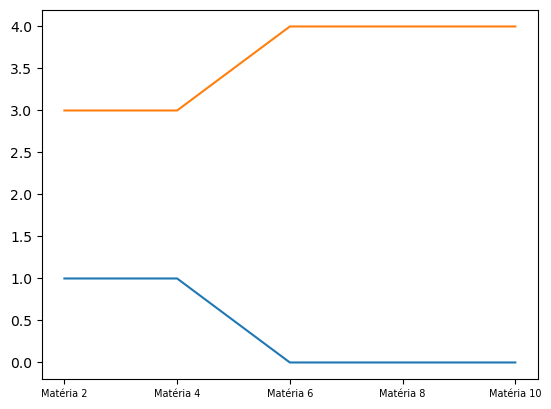

In [25]:
fig, ax = plt.subplots()
erros_acertos_vestibular(fig, ax, "FUVEST")

In [26]:
# def roda_erros_acertos_vestibular():
#     im=interact_manual(
#         erros_acertos_vestibular,
#         vestibular=widgets.Text(value='ENEM'))

#     im.widget.children[0].description = 'Vestibular'
# roda_erros_acertos_vestibular()

In [20]:
def erros_acertos_ano(vestibular, ano_i, ano_f):
    fig, ax = plt.subplots()
    all_response = all_response_2
    if "todos" not in vestibular:
        all_response = all_response[all_response['vestibular'].isin(vestibular)]
    all_response = all_response[all_response["ano_exercicio"] >= ano_i]
    all_response = all_response[all_response["ano_exercicio"] <= ano_f]

    all_response_certo = all_response[all_response["correta"] == True]
    contagem_certa = all_response_certo["fk_materia"].value_counts()
    contagem_certa = contagem_certa.reset_index()
    contagem_certa.rename(columns={"index": "materia"}, inplace=True)

    all_response_errado = all_response[all_response["correta"] == False]
    contagem_errada = all_response_errado["fk_materia"].value_counts()
    contagem_errada = contagem_errada.reset_index()
    contagem_errada.rename(columns={"index": "materia"}, inplace=True)
    contagem = pd.merge(contagem_certa, contagem_errada, on="materia", how="outer")
    contagem = contagem.fillna(0)

    # Plotar o gráfico nos eixos fornecidos
    ax.plot(contagem["materia"], contagem["fk_materia_x"], "-")
    ax.plot(contagem["materia"], contagem["fk_materia_y"], "-")
    ax.set_xticks(contagem["materia"])
    ax.set_xticklabels(contagem["materia"], fontsize=7)

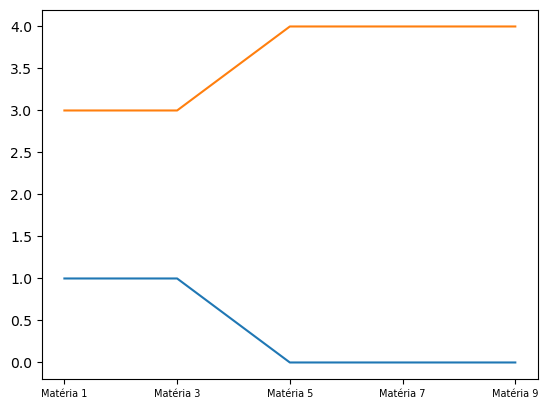

In [21]:

erros_acertos_ano(["ENEM"], 2020, 2030)

In [22]:
def erros_acertos_ano_assunto(vestibular, ano_i, ano_f):
    fix, ax=plt.subplots()
    all_response = all_response_2
    if "todos" not in vestibular:
        all_response = all_response[all_response['vestibular'].isin(vestibular)]
    all_response = all_response[all_response["ano_exercicio"] >= ano_i]
    all_response = all_response[all_response["ano_exercicio"] <= ano_f]

    all_response_certo = all_response[all_response["correta"] == True]
    contagem_certa = all_response_certo["fk_assunto"].value_counts()
    contagem_certa = contagem_certa.reset_index()
    contagem_certa.rename(columns={"index": "assunto"}, inplace=True)

    all_response_errado = all_response[all_response["correta"] == False]
    contagem_errada = all_response_errado["fk_assunto"].value_counts()
    contagem_errada = contagem_errada.reset_index()
    contagem_errada.rename(columns={"index": "assunto"}, inplace=True)
    contagem = pd.merge(contagem_certa, contagem_errada, on="assunto", how="outer")
    contagem = contagem.fillna(0)

    # Plotar o gráfico nos eixos fornecidos
    ax.plot(contagem["assunto"], contagem["fk_assunto_x"], "-")
    ax.plot(contagem["assunto"], contagem["fk_assunto_y"], "-")
    ax.set_xticks(contagem["assunto"])
    ax.set_xticklabels(contagem["assunto"], rotation=45, ha="right", fontsize=7)

In [23]:
# fig, ax = plt.subplots()
# erros_acertos_ano_assunto(fig, ax, ["FUVEST"], 2020, 2030)

In [24]:
def linha_temporal_materia(materia, vestibular, ano_i, ano_f):
    fig, ax = plt.subplots()
    all_response = all_response_2
    if "todos" not in vestibular:
        all_response = all_response[all_response['vestibular'].isin(vestibular)]
    if "todos" not in materia:
        all_response = all_response[all_response['fk_materia'].isin(materia)]
    all_response = all_response[all_response["ano_exercicio"] >= ano_i]
    all_response = all_response[all_response["ano_exercicio"] <= ano_f]

    all_response_certo = all_response[all_response["correta"] == True]
    all_response_certo['mes'] = all_response_certo['created_at_x'].dt.to_period('M')
    certo_grouped = all_response_certo.groupby('mes').size().reset_index(name='ocorrencias_por_mes')

    all_response_errado = all_response[all_response["correta"] == False]
    all_response_errado['mes'] = all_response_errado['created_at_x'].dt.to_period('M')
    errado_grouped = all_response_errado.groupby('mes').size().reset_index(name='ocorrencias_por_mes')

    contagem = pd.merge(errado_grouped, certo_grouped, on="mes", how="outer")
    contagem = contagem.fillna(0)
#     return contagem
    contagem['mes'] = contagem['mes'].astype(str)

#     # Plotar o gráfico nos eixos fornecidos
#     linha_errado=ax.plot(contagem["mes"], contagem["ocorrencias_por_mes_x"], "-")
#     linha_certo=ax.plot(contagem["mes"], contagem["ocorrencias_por_mes_y"], "-")
#     ax.legend([linha_errado, linha_certo], ['Errado', 'Certo'])
#     ax.set_xticks(contagem["mes"])
#     ax.set_xticklabels(contagem["mes"], fontsize=7)
    plt.xlabel("Mês")
    plt.ylabel("Número de Ocorrências")
    plt.title("Evolução de Respostas ao Longo do Meses(Matéria)")
    plt.plot(contagem["mes"], contagem["ocorrencias_por_mes_x"], "-", label='Errado')
    plt.plot(contagem["mes"], contagem["ocorrencias_por_mes_y"], "-", label='Certo')
    plt.xticks(range(len(contagem)), contagem["mes"], fontsize=7, rotation=45)
    plt.legend()

In [25]:
# fig, ax = plt.subplots()
# linha_temporal_materia(fig, ax,"todos", "todos", 2000, 2030)

In [26]:
def linha_temporal_assunto(assuntos, vestibular, ano_i, ano_f):
    fig, ax = plt.subplots()
    all_response = all_response_2
    if "todos" not in vestibular:
        all_response = all_response[all_response['vestibular'].isin(vestibular)]
    if "todos" not in assuntos:
        all_response = all_response[all_response['fk_assunto'].isin(assuntos)]
#         return all_response
    all_response = all_response[all_response["ano_exercicio"] >= ano_i]
    all_response = all_response[all_response["ano_exercicio"] <= ano_f]

    all_response_certo = all_response[all_response["correta"] == True]
    all_response_certo['mes'] = all_response_certo['created_at_x'].dt.to_period('M')
    certo_grouped = all_response_certo.groupby('mes').size().reset_index(name='ocorrencias_por_mes')

    all_response_errado = all_response[all_response["correta"] == False]
    all_response_errado['mes'] = all_response_errado['created_at_x'].dt.to_period('M')
    errado_grouped = all_response_errado.groupby('mes').size().reset_index(name='ocorrencias_por_mes')

    contagem = pd.merge(errado_grouped, certo_grouped, on="mes", how="outer")
    contagem = contagem.fillna(0)
#     return contagem
    contagem['mes'] = contagem['mes'].astype(str)

#     # Plotar o gráfico nos eixos fornecidos
#     linha_errado=ax.plot(contagem["mes"], contagem["ocorrencias_por_mes_x"], "-")
#     linha_certo=ax.plot(contagem["mes"], contagem["ocorrencias_por_mes_y"], "-")
#     ax.legend([linha_errado, linha_certo], ['Errado', 'Certo'])
#     ax.set_xticks(contagem["mes"])
#     ax.set_xticklabels(contagem["mes"], fontsize=7)
    plt.xlabel("Mês")
    plt.ylabel("Número de Ocorrências")
    plt.title("Evolução de Respostas ao Longo do Meses(Assunto)")
    plt.plot(contagem["mes"], contagem["ocorrencias_por_mes_x"], "-", label='Errado')
    plt.plot(contagem["mes"], contagem["ocorrencias_por_mes_y"], "-", label='Certo')
    plt.xticks(range(len(contagem)), contagem["mes"], fontsize=7, rotation=45)
    plt.legend()

In [27]:
# fig, ax = plt.subplots()
# linha_temporal_assunto(fig, ax,['Assunto 1', 'Assunto 2'], "todos", 2000, 2030)

In [28]:
def linha_temporal_materia_semana(materias, vestibular, ano_i, ano_f):
    fig, ax=plt.subplots()
    all_response = all_response_2
    if "todos" not in vestibular:
        all_response = all_response[all_response['vestibular'].isin(vestibular)]
    if "todos" not in materias:
        all_response = all_response[all_response['fk_materia'].isin(materias)]
    all_response = all_response[all_response["ano_exercicio"] >= ano_i]
    all_response = all_response[all_response["ano_exercicio"] <= ano_f]

    all_response_certo = all_response[all_response["correta"] == True]
    all_response_certo['week'] = all_response_certo['created_at_x'].dt.to_period('W')
    certo_grouped = all_response_certo.groupby('week').size().reset_index(name='ocorrencias_por_semana')
#     return all_response_certo

    all_response_errado = all_response[all_response["correta"] == False]
    all_response_errado['week'] = all_response_errado['created_at_x'].dt.to_period('W')
    errado_grouped = all_response_errado.groupby('week').size().reset_index(name='ocorrencias_por_semana')

    contagem = pd.merge(errado_grouped, certo_grouped, on="week", how="outer")
    contagem = contagem.fillna(0)
    contagem['week'] = contagem['week'].astype(str)

    plt.xlabel("Semana")
    plt.ylabel("Número de Ocorrências")
    plt.title("Evolução de Respostas ao Longo de semanas (Matéria)")
    plt.plot(contagem["week"], contagem["ocorrencias_por_semana_x"], "-", label='Errado')
    plt.plot(contagem["week"], contagem["ocorrencias_por_semana_y"], "-", label='Certo')
    plt.xticks(range(len(contagem)), contagem["week"], fontsize=7, rotation=45)
    plt.legend()

In [29]:
# fig, ax = plt.subplots()
# linha_temporal_materia_semana(fig, ax,['Matéria 1', 'Matéria 2', 'Matéria 3'], ['ENEM'], 2000, 2030)

In [30]:
def linha_temporal_assunto_semana(assuntos, vestibular, ano_i, ano_f):
    fig, ax=plt.subplots()
    all_response = all_response_2
    if "todos" not in vestibular:
        all_response = all_response[all_response['vestibular'].isin(vestibular)]
    if "todos" not in assuntos:
        all_response = all_response[all_response['fk_assunto'].isin(assuntos)]
#     return all_response
    all_response = all_response[all_response["ano_exercicio"] >= ano_i]
    all_response = all_response[all_response["ano_exercicio"] <= ano_f]

    all_response_certo = all_response[all_response["correta"] == True]
    all_response_certo['week'] = all_response_certo['created_at_x'].dt.to_period('W')
    certo_grouped = all_response_certo.groupby('week').size().reset_index(name='ocorrencias_por_semana')
#     return certo_grouped

    all_response_errado = all_response[all_response["correta"] == False]
    all_response_errado['week'] = all_response_errado['created_at_x'].dt.to_period('W')
    errado_grouped = all_response_errado.groupby('week').size().reset_index(name='ocorrencias_por_semana')

    contagem = pd.merge(errado_grouped, certo_grouped, on="week", how="outer")
    contagem = contagem.fillna(0)
    contagem['week'] = contagem['week'].astype(str)

    ax.set_xlabel("Semana")
    ax.set_ylabel("Número de Ocorrências")
    ax.set_title("Evolução de Respostas ao Longo de Semanas (Assunto)")
    ax.plot(contagem["week"], contagem["ocorrencias_por_semana_x"], "-", label='Errado')
    ax.plot(contagem["week"], contagem["ocorrencias_por_semana_y"], "-", label='Certo')
    ax.set_xticks(range(len(contagem)))
    ax.set_xticklabels(contagem["week"], fontsize=7, rotation=45)
    ax.legend()

In [31]:
# fig, ax = plt.subplots()
# linha_temporal_assunto_semana(fig, ax,['Assunto 1', 'Assunto 2', 'Assunto 3'], ['ENEM'], 2000, 2030)

In [32]:
def erros_acertos_ano_vestibular(materias, assuntos ,ano_i, ano_f):
    fig,ax = plt.subplots()
    all_response = all_response_2
    all_response = all_response[all_response["ano_exercicio"] >= ano_i]
    all_response = all_response[all_response["ano_exercicio"] <= ano_f]
    if "todos" not in assuntos:
        all_response = all_response[all_response['fk_assunto'].isin(assuntos)]
    if "todos" not in materias:
        all_response = all_response[all_response['fk_materia'].isin(materias)]
        
    all_response_certo = all_response[all_response["correta"] == True]
    contagem_certa = all_response_certo["vestibular"].value_counts()
    contagem_certa = contagem_certa.reset_index()
    contagem_certa.rename(columns={"index": "vestibular_nome"}, inplace=True)
    all_response_errado = all_response[all_response["correta"] == False]
    contagem_errada = all_response_errado["vestibular"].value_counts()
    contagem_errada = contagem_errada.reset_index()
    contagem_errada.rename(columns={"index": "vestibular_nome"}, inplace=True)
    contagem = pd.merge(contagem_certa, contagem_errada, on="vestibular_nome", how="outer")
    contagem = contagem.fillna(0)
#     return contagem
    # Plotar o gráfico nos eixos fornecidos
#     ax.plot(contagem["vestibular_nome"], contagem["vestibular_x"], "-")
#     ax.plot(contagem["vestibular_nome"], contagem["vestibular_y"], "-")
#     ax.set_xticks(contagem["vestibular_nome"])
#     ax.set_xticklabels(contagem["vestibular_nome"], fontsize=7)
    ax.plot(contagem["vestibular_nome"], contagem["vestibular_x"], "-o", label="Corretas")
    ax.plot(contagem["vestibular_nome"], contagem["vestibular_y"], "-o", label="Incorretas")
    ax.set_xticks(contagem.index)
    ax.set_xticklabels(contagem["vestibular_nome"], rotation=45, ha="right", fontsize=7)
    ax.set_xlabel("Vestibulares")
    ax.set_ylabel("Quantidade de Respostas")
    ax.legend()

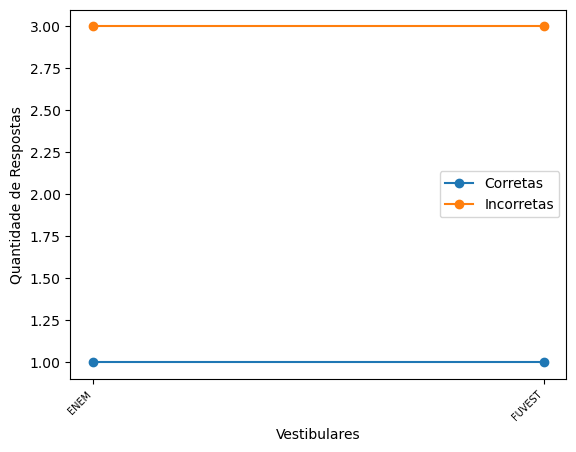

In [33]:
# fig, ax = plt.subplots()
erros_acertos_ano_vestibular(['Matéria 1', 'Matéria 2'], ["todos"], 2000, 2030)

In [34]:
# def erros_acertos_ano(vestibular, ano_i, ano_f):
#     fig, ax = plt.subplots()
#     all_response = all_response_2
#     if "todos" not in vestibular:
#         all_response = all_response[all_response['vestibular'].isin(vestibular)]
#     all_response = all_response[all_response["ano_exercicio"] >= ano_i]
#     all_response = all_response[all_response["ano_exercicio"] < ano_f]

#     all_response_certo = all_response[all_response["correta"] == True]
#     contagem_certa = all_response_certo["fk_materia"].value_counts()
#     contagem_certa = contagem_certa.reset_index()
#     contagem_certa.rename(columns={"index": "materia"}, inplace=True)

#     all_response_errado = all_response[all_response["correta"] == False]
#     contagem_errada = all_response_errado["fk_materia"].value_counts()
#     contagem_errada = contagem_errada.reset_index()
#     contagem_errada.rename(columns={"index": "materia"}, inplace=True)
#     contagem = pd.merge(contagem_certa, contagem_errada, on="materia", how="outer")
#     contagem = contagem.fillna(0)

#     # Plotar o gráfico nos eixos fornecidos
#     ax.plot(contagem["materia"], contagem["fk_materia_x"], "-")
#     ax.plot(contagem["materia"], contagem["fk_materia_y"], "-")
#     ax.set_xticks(contagem["materia"])
#     ax.set_xticklabels(contagem["materia"], fontsize=7)

def roda_erros_acertos_ano_materia():
    im=interact_manual(
        erros_acertos_ano,
         vestibular=widgets.SelectMultiple(
            options=opcoes_vestibulares,
            value=['todos'],
            description='Vestibulares',
            disabled=False
            ),
         ano_i=widgets.IntSlider(value=1500,  min=2, max=2023),
         ano_f=widgets.IntSlider(value=2023,  min=2, max=3000))
    plt.show()
    
def roda_erros_acertos_ano_assunto():
    im=interact_manual(
        erros_acertos_ano_assunto,
         vestibular=widgets.SelectMultiple(
            options=opcoes_vestibulares,
            value=['todos'],
            description='Vestibulares',
            disabled=False
            ),
         ano_i=widgets.IntSlider(value=1500,  min=2, max=2023),
         ano_f=widgets.IntSlider(value=2023,  min=2, max=3000))
    plt.show()
    
def roda_linha_temporal_materia_mes():
    im=interact_manual(
        linha_temporal_materia,
        materia=widgets.SelectMultiple(
            options=opcoes_materias,
            value=['todos'],
            description='Materias',
            disabled=False
            ),
         vestibular=widgets.SelectMultiple(
            options=opcoes_vestibulares,
            value=['todos'],
            description='Vestibulares',
            disabled=False
            ),
         ano_i=widgets.IntSlider(value=1500,  min=2, max=2023),
         ano_f=widgets.IntSlider(value=2023,  min=2, max=3000))
    plt.show()
def roda_linha_temporal_assunto_mes():
    im=interact_manual(
        linha_temporal_assunto,
        assuntos=widgets.SelectMultiple(
            options=opcoes_assuntos,
            value=['todos'],
            description='Assuntos',
            disabled=False
            ),
         vestibular=widgets.SelectMultiple(
            options=opcoes_vestibulares,
            value=['todos'],
            description='Vestibulares',
            disabled=False
            ),
         ano_i=widgets.IntSlider(value=1500,  min=2, max=2023),
         ano_f=widgets.IntSlider(value=2023,  min=2, max=3000))
    plt.show()
    
def roda_linha_temporal_materia_semana():
    im=interact_manual(
        linha_temporal_materia_semana,
        materias=widgets.SelectMultiple(
            options=opcoes_materias,
            value=['todos'],
            description='Materias',
            disabled=False
            ),
         vestibular=widgets.SelectMultiple(
            options=opcoes_vestibulares,
            value=['todos'],
            description='Vestibulares',
            disabled=False
            ),
         ano_i=widgets.IntSlider(value=1500,  min=2, max=2023),
         ano_f=widgets.IntSlider(value=2023,  min=2, max=3000))
    plt.show()
    
def roda_linha_temporal_assunto_semana():
    im=interact_manual(
        linha_temporal_assunto_semana,
        assuntos=widgets.SelectMultiple(
            options=opcoes_assuntos,
            value=['todos'],
            description='Assuntos',
            disabled=False
            ),
         vestibular=widgets.SelectMultiple(
            options=opcoes_vestibulares,
            value=['todos'],
            description='Vestibulares',
            disabled=False
            ),
         ano_i=widgets.IntSlider(value=1500,  min=2, max=2023),
         ano_f=widgets.IntSlider(value=2023,  min=2, max=3000))
    plt.show()
def roda_erros_acertos_ano_vestibular():
    im=interact_manual(
        erros_acertos_ano_vestibular,
        materias=widgets.SelectMultiple(
                options=opcoes_materias,
                value=['todos'],
                description='Materias',
                disabled=False
            ),
        assuntos=widgets.SelectMultiple(
            options=opcoes_assuntos,
            value=['todos'],
            description='Assuntos',
            disabled=False
            ),
         ano_i=widgets.IntSlider(value=1500,  min=2, max=2023),
         ano_f=widgets.IntSlider(value=2023,  min=2, max=3000))
    plt.show()
        


In [35]:
# roda_erros_acertos_ano_vestibular()
# roda_linha_temporal_assunto_semana()
# roda_erros_acertos_ano_assunto()
# roda_erros_acertos_ano_materia()

In [36]:
all_response

,id_exercicio,letra_respondida,created_at_x,updated_at_x,ano_exercicio,vestibular,fk_assunto,fk_materia,letra,correta
0,1,A,2023-07-05,2023-07-05,2023,ENEM,Assunto 1,Matéria 1,A,True
1,1,A,2023-07-05,2023-07-05,2023,ENEM,Assunto 1,Matéria 1,K,False
2,1,C,2023-08-10,2023-08-10,2023,ENEM,Assunto 1,Matéria 1,A,False
3,1,C,2023-08-10,2023-08-10,2023,ENEM,Assunto 1,Matéria 1,K,False
4,2,B,2023-08-05,2023-08-05,2023,FUVEST,Assunto 2,Matéria 2,B,True
5,2,B,2023-08-05,2023-08-05,2023,FUVEST,Assunto 2,Matéria 2,L,False
6,2,D,2023-07-28,2023-07-28,2023,FUVEST,Assunto 2,Matéria 2,B,False
7,2,D,2023-07-28,2023-07-28,2023,FUVEST,Assunto 2,Matéria 2,L,False
8,3,C,2023-01-08,2023-01-08,2023,ENEM,Assunto 3,Matéria 3,C,True
9,3,C,2023-01-08,2023-01-08,2023,ENEM,Assunto 3,Matéria 3,M,False


In [40]:
def linha_temporal_materia_semana(materias, vestibular, ano_i, ano_f, ranking, ordem):
    try:
        fig, ax=plt.subplots(figsize=(14, 11))
        all_response = all_response_2
        if "todos" not in vestibular:
            all_response = all_response[all_response['vestibular'].isin(vestibular)]
        if "todos" not in materias:
            all_response = all_response[all_response['fk_materia'].isin(materias)]
        all_response = all_response[all_response["ano_exercicio"] >= ano_i]
        all_response = all_response[all_response["ano_exercicio"] <= ano_f]

        all_response_certo = all_response[all_response["correta"] == True]
#         all_response_certo['week'] = all_response_certo['created_at_x'].dt.to_period('W')
#         certo_grouped = all_response_certo.groupby('week').size().reset_index(name='ocorrencias_por_semana')
    #     return all_response_certo

        all_response_errado = all_response[all_response["correta"] == False]
#         all_response_errado['week'] = all_response_errado['created_at_x'].dt.to_period('W')
#         errado_grouped = all_response_errado.groupby('week').size().reset_index(name='ocorrencias_por_semana')
        semana_inicial = pd.Period('2023-06-11', freq='W')

# Crie uma lista para armazenar as contagens por semana
        contagens_por_semana = []

# Loop para calcular as contagens das próximas semanas com base no ranking
        for i in range(ranking):
            # Calcule a data de início e fim da semana
            inicio_semana = semana_inicial.start_time
            fim_semana = semana_inicial.end_time

            # Suponha que 'all_response_certo' e 'all_response_errado' sejam seus DataFrames originais
            # Filtre as datas dentro da semana
            certo_semana = all_response_certo[(all_response_certo['created_at_x'] >= inicio_semana) & (all_response_certo['created_at_x'] <= fim_semana)]
            errado_semana = all_response_errado[(all_response_errado['created_at_x'] >= inicio_semana) & (all_response_errado['created_at_x'] <= fim_semana)]

            # Calcule as contagens para esta semana
            contagem_certo = len(certo_semana)
            contagem_errado = len(errado_semana)

            # Armazene as contagens em uma lista
            contagens_por_semana.append({
                'week': semana_inicial,
                'ocorrencias_por_semana_certo': contagem_certo,
                'ocorrencias_por_semana_errado': contagem_errado
            })

            # Atualize a semana_inicial para a próxima semana
            semana_inicial += 1

        # Converta a lista de contagens em um DataFrame
        contagens_df = pd.DataFrame(contagens_por_semana)
        return contagens_df
    
    
        contagem = pd.merge(errado_grouped, certo_grouped, on="week", how="outer")
        contagem = contagem.fillna(0)
        contagem['week'] = contagem['week'].astype(str)
        if contagem.empty:
            return "Sem dados"
            # Plotar o gráfico nos eixos fornecidos
            # ranking_aux=ranking-1
        if ordem == "crescente_erros":
            contagem = contagem.sort_values(by="ocorrencias_por_semana_x", ascending=True)
        elif ordem == "decrescente_erros":
            contagem = contagem.sort_values(by="ocorrencias_por_semana_x", ascending=False)
        elif ordem == "crescente_acertos":
            contagem = contagem.sort_values(by="ocorrencias_por_semana_y", ascending=True)
        elif ordem == "decrescente_acertos":
            contagem = contagem.sort_values(by="ocorrencias_por_semana_y", ascending=False)
        if ranking > len(contagem):
            ranking = len(contagem)
        ax.plot(contagem["week"][0:ranking], contagem["ocorrencias_por_semana_x"][0:ranking], "-", label='Errado')
        ax.plot(contagem["week"][0:ranking], contagem["ocorrencias_por_semana_y"][0:ranking], "-", label='Certo')
        ax.set_xticks(range(len(contagem[0:ranking])))
        ax.set_xticklabels(contagem["week"][0:ranking], fontsize=7, rotation=45)
        ax.set_xlabel("Semanas", fontsize=14)
        ax.set_ylabel("Quantidade de Respostas", fontsize=14)
        ax.set_title("Acertos por Matéria Tempo", fontsize=14)
        ax.legend()
        return contagem
    except Exception as e:
        return f"Erro ao criar o gráfico: {str(e)}"
    return plt

,week,ocorrencias_por_semana_certo,ocorrencias_por_semana_errado
0,2023-06-05/2023-06-11,0,6
1,2023-06-12/2023-06-18,0,4
2,2023-06-19/2023-06-25,1,5
3,2023-06-26/2023-07-02,0,0
4,2023-07-03/2023-07-09,0,0


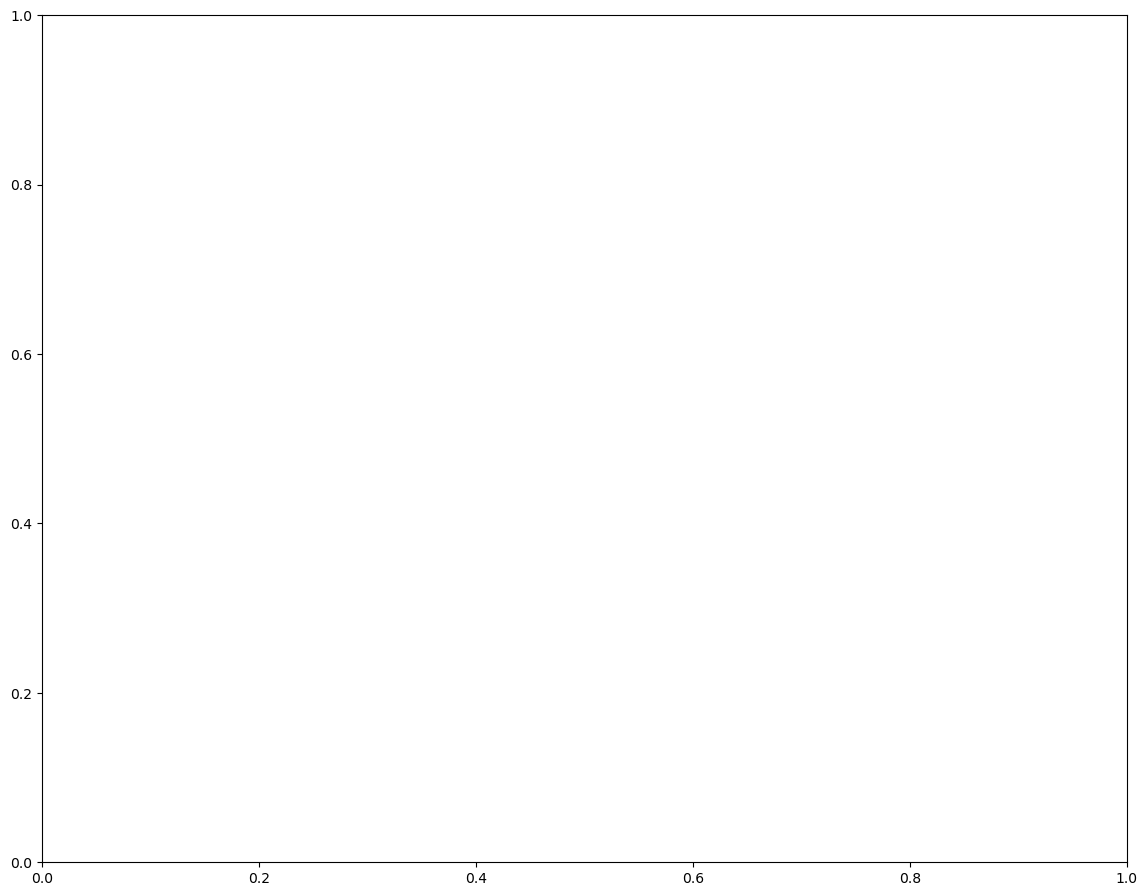

In [41]:
linha_temporal_materia_semana("todos", "todos", 2023, 2023, 5, "crescente_erros")

In [39]:
all_response

,id_exercicio,letra_respondida,created_at_x,updated_at_x,ano_exercicio,vestibular,fk_assunto,fk_materia,letra,correta
0,1,A,2023-02-15,2023-02-15,2023,ENEM,Assunto 1,Matéria 1,A,True
1,1,A,2023-02-15,2023-02-15,2023,ENEM,Assunto 1,Matéria 1,K,False
2,1,C,2023-07-12,2023-07-12,2023,ENEM,Assunto 1,Matéria 1,A,False
3,1,C,2023-07-12,2023-07-12,2023,ENEM,Assunto 1,Matéria 1,K,False
4,2,B,2023-03-23,2023-03-23,2023,FUVEST,Assunto 2,Matéria 2,B,True
5,2,B,2023-03-23,2023-03-23,2023,FUVEST,Assunto 2,Matéria 2,L,False
6,2,D,2023-06-11,2023-06-11,2023,FUVEST,Assunto 2,Matéria 2,B,False
7,2,D,2023-06-11,2023-06-11,2023,FUVEST,Assunto 2,Matéria 2,L,False
8,3,C,2023-06-24,2023-06-24,2023,ENEM,Assunto 3,Matéria 3,C,True
9,3,C,2023-06-24,2023-06-24,2023,ENEM,Assunto 3,Matéria 3,M,False
